In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from matplotlib.collections import LineCollection
from sklearn.metrics import *

In [2]:
y_pred = pd.read_csv('plot/readbomb_anomaly_value.csv')
y = pd.read_csv('plot/readbomb_true_value.csv')

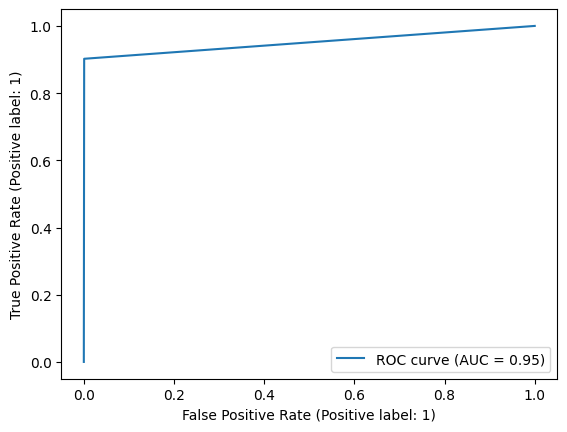

In [3]:
plot = RocCurveDisplay.from_predictions(y,y_pred,pos_label=1,name='ROC curve',linewidth=1.5)

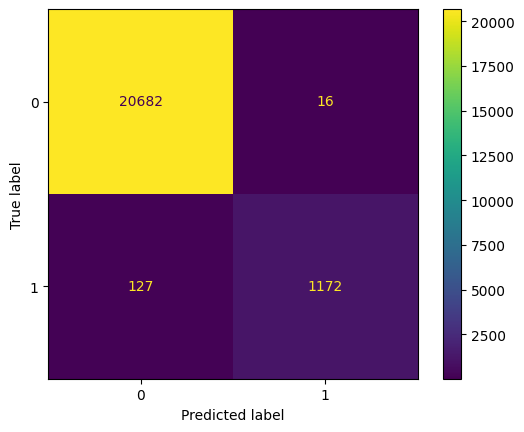

In [4]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [5]:
# files = ['arp','combination','injection','readbomb','recon','synflood','malware']
# score = []
# for file in files:
#     y_pred = pd.read_csv('plot/'+file+'_anomaly_value.csv')
#     y_true = pd.read_csv('plot/'+file+'_true_value.csv')
#     score.append([file, 'precision', precision_score(y_true, y_pred, average='weighted')])
#     score.append([file, 'recall', recall_score(y_true, y_pred, average='weighted')])
#     score.append([file, 'f1', f1_score(y_true, y_pred, average='weighted')])
#     score.append([file, 'accuracy', accuracy_score(y_true, y_pred)])
#     score.append([file, 'AUC', auc_score(y_true, y_pred)])
    
# score = pd.DataFrame(score)
# score.columns = ['attack','score','value']

In [6]:
files = ['arp','combination','injection','readbomb','recon','synflood','malware']
score = []
for file in files:
    y_pred = pd.read_csv('plot/'+file+'_anomaly_value.csv')
    y_true = pd.read_csv('plot/'+file+'_true_value.csv')
    score.append([file, 'precision', precision_score(y_true, y_pred, average='macro')])
    score.append([file, 'recall', recall_score(y_true, y_pred, average='macro')])
    score.append([file, 'f1', f1_score(y_true, y_pred, average='macro')])
    score.append([file, 'accuracy', accuracy_score(y_true, y_pred)])
    
score = pd.DataFrame(score)
score.columns = ['attack','score','value']

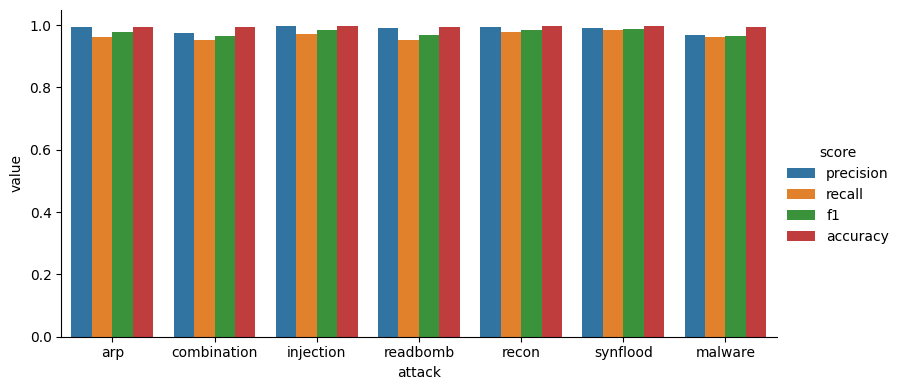

In [7]:
sns.catplot(x='attack', y='value', hue='score', data=score, kind='bar', height=4, aspect=2,)

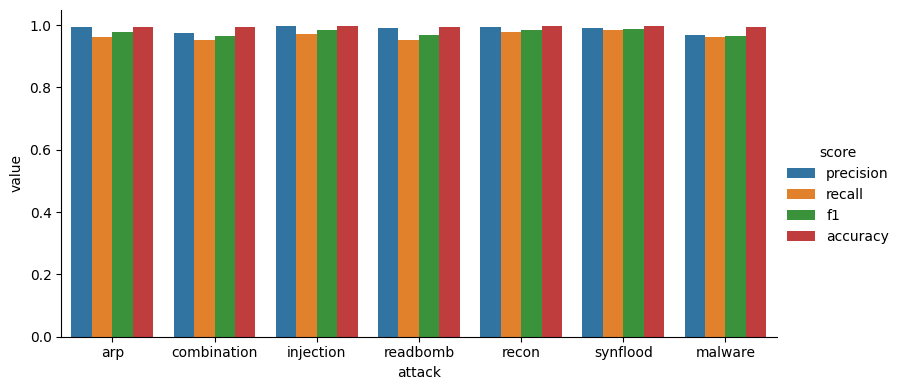

In [8]:
sns.catplot(x='attack', y='value', hue='score', data=score, kind='bar', height=4, aspect=2,)

In [9]:
print(score)

         attack      score     value
0           arp  precision  0.993905
1           arp     recall  0.960362
2           arp         f1  0.976459
3           arp   accuracy  0.994840
4   combination  precision  0.975559
5   combination     recall  0.952145
6   combination         f1  0.963514
7   combination   accuracy  0.992090
8     injection  precision  0.998267
9     injection     recall  0.970301
10    injection         f1  0.983828
11    injection   accuracy  0.996714
12     readbomb  precision  0.990214
13     readbomb     recall  0.950730
14     readbomb         f1  0.969528
15     readbomb   accuracy  0.993499
16        recon  precision  0.992389
17        recon     recall  0.977634
18        recon         f1  0.984884
19        recon   accuracy  0.996863
20     synflood  precision  0.991060
21     synflood     recall  0.985219
22     synflood         f1  0.988120
23     synflood   accuracy  0.997728
24      malware  precision  0.967152
25      malware     recall  0.963154
2

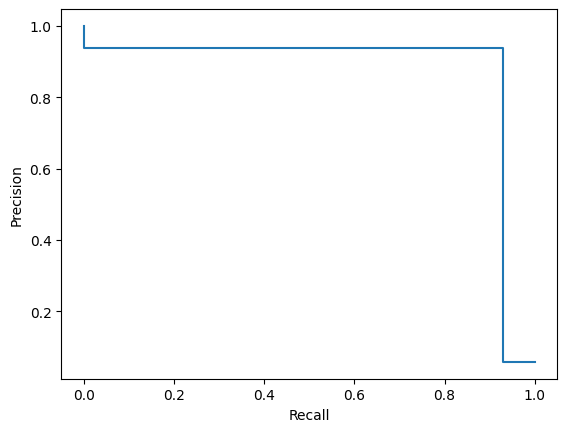

In [11]:
precision, recall, _ = precision_recall_curve(y_true, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()